In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("allData.pkl","rb") as f:
    data=pickle.load(f)

In [3]:
data.keys()

dict_keys(['LabAnalysis', 'Resources', 'TomQuality', 'Production', 'CropParameters', 'GrodanSens', 'GreenhouseClimate'])

In [4]:
#View the data
data['Production']

,%time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,43880,0.037,0.0,0.1,50.0,NaN,128.0,0,0
1,43885,0.767,0.0,0.9,54.5,136.0,1271.0,0,0
2,43889,0.232,0.0,0.6,51.0,89.0,788.0,0,0
3,43894,0.778,0.0,1.5,55.1,226.0,2001.0,0,0
4,43899,0.248,0.0,0.9,53.6,133.0,1144.0,0,0
...,...,...,...,...,...,...,...,...,...
135,43964,0.720,0.0,1.0,43.4,126.0,1482.0,0,0
136,43969,0.790,0.0,0.6,46.4,85.0,1054.0,0,0
137,43973,0.860,0.0,1.1,43.7,152.0,2018.0,0,0
138,43977,0.670,0.0,0.9,41.8,132.0,1974.0,0,0


In [5]:
#storing files under crop parameter to cr 
prd = data['Production']

In [6]:
#Viewing the shape of data
prd.shape

(140, 9)

In [7]:
#Describing the data
prd.describe()

,%time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
count,140.000000,140.000000,140.000000,138.000000,139.000000,134.000000,140.000000,140.000000,140.000000
mean,43927.764286,0.593343,0.014044,0.942029,49.333094,132.798507,1261.910714,1.685714,17.807143
std,47.139104,0.240515,0.075209,0.387545,4.840445,54.861655,557.100878,8.216570,84.159740
min,43510.000000,0.010000,0.000000,0.100000,31.800000,0.000000,0.000000,0.000000,0.000000
25%,43903.000000,0.407500,0.000000,0.700000,46.800000,89.250000,829.500000,0.000000,0.000000
50%,43931.000000,0.611500,0.000000,0.950000,50.000000,133.500000,1279.500000,0.000000,0.000000
75%,43959.000000,0.745000,0.000000,1.200000,53.000000,167.750000,1613.250000,0.000000,0.000000
max,43980.000000,1.213000,0.600000,2.500000,60.000000,313.000000,2810.000000,74.000000,677.000000


In [8]:
#Checking for number of unique data entries in each column
prd.nunique()

%time                        25
ProdA                        88
ProdB                        17
avg_nr_harvested_trusses     20
Truss development time       55
Nr_fruits_ClassA             99
Weight_fruits_ClassA        136
Nr_fruits_ClassB              9
Weight_fruits_ClassB          9
dtype: int64

In [9]:
#Checking for unique data entries in each column
for col in prd.columns:
    print('{} : {}'.format(col,prd[col].unique()))

%time : [43880 43885 43889 43894 43899 43903 43908 43913 43917 43922 43927 43931
 43936 43941 43945 43950 43955 43959 43964 43969 43973 43977 43980 43510
 43875]
ProdA : [0.037 0.767 0.232 0.778 0.248 0.354 0.795 0.486 0.454 0.697 0.398 0.595
 0.588 0.72  0.519 0.995 0.613 0.688 0.88  0.67  0.762 1.213 0.859 0.32
 0.4   0.34  0.49  0.37  0.61  0.46  0.91  0.3   0.17  0.71  0.66  0.74
 0.81  0.64  0.59  0.68  0.89  0.78  0.97  1.05  0.01  0.83  0.39  0.8
 0.6   0.31  0.57  0.25  0.54  0.63  0.65  0.7   0.58  0.33  0.53  0.05
 0.79  0.42  0.27  0.62  0.35  0.44  0.51  0.93  0.73  0.47  1.02  0.07
 0.82  0.87  0.45  0.5   0.28  0.69  0.85  0.52  1.07  0.12  0.48  0.38
 0.41  0.76  0.86  1.11 ]
ProdB : [0.      0.003   0.011   0.0022  0.0008  0.004   0.5832  0.1     0.00322
 0.6     0.0028  0.0065  0.0058  0.073   0.0967  0.2621  0.0097 ]
avg_nr_harvested_trusses : [0.1 0.9 0.6 1.5 0.7 1.  1.2 0.8 0.3 2.1 nan 1.1 0.4 2.5 0.5 1.3 1.4 1.8
 0.2 1.6 2.2]
Truss development time  : [50.  54.5 51

In [10]:
#Checking the data type of each column
prd.dtypes

%time                         int64
ProdA                       float64
ProdB                       float64
avg_nr_harvested_trusses    float64
Truss development time      float64
Nr_fruits_ClassA            float64
Weight_fruits_ClassA        float64
Nr_fruits_ClassB              int64
Weight_fruits_ClassB          int64
dtype: object

In [11]:
#Displaying all the column headings
prd.columns

Index(['%time', 'ProdA', 'ProdB', 'avg_nr_harvested_trusses',
       'Truss development time ', 'Nr_fruits_ClassA', 'Weight_fruits_ClassA',
       'Nr_fruits_ClassB', 'Weight_fruits_ClassB'],
      dtype='object')

In [12]:
#Renaming
prd.rename(columns={"%time": "Time"}, inplace=True)

In [13]:
#View the data
prd.head()

,Time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,43880,0.037,0.0,0.1,50.0,NaN,128.0,0,0
1,43885,0.767,0.0,0.9,54.5,136.0,1271.0,0,0
2,43889,0.232,0.0,0.6,51.0,89.0,788.0,0,0
3,43894,0.778,0.0,1.5,55.1,226.0,2001.0,0,0
4,43899,0.248,0.0,0.9,53.6,133.0,1144.0,0,0


In [14]:
#changing time to its standard format 
prd['Time'] = pd.to_datetime(prd['Time'], unit='D', origin='1899-12-30')

In [15]:
#View the data
prd.head()

,Time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,2020-02-19,0.037,0.0,0.1,50.0,NaN,128.0,0,0
1,2020-02-24,0.767,0.0,0.9,54.5,136.0,1271.0,0,0
2,2020-02-28,0.232,0.0,0.6,51.0,89.0,788.0,0,0
3,2020-03-04,0.778,0.0,1.5,55.1,226.0,2001.0,0,0
4,2020-03-09,0.248,0.0,0.9,53.6,133.0,1144.0,0,0


In [16]:
#Checking for Null values in the data
prd.isnull()

,Time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
135,False,False,False,False,False,False,False,False,False
136,False,False,False,False,False,False,False,False,False
137,False,False,False,False,False,False,False,False,False
138,False,False,False,False,False,False,False,False,False


In [17]:
#Checking for the sum of the null values in the data
prd.isnull().sum()

Time                        0
ProdA                       0
ProdB                       0
avg_nr_harvested_trusses    2
Truss development time      1
Nr_fruits_ClassA            6
Weight_fruits_ClassA        0
Nr_fruits_ClassB            0
Weight_fruits_ClassB        0
dtype: int64

<AxesSubplot:>

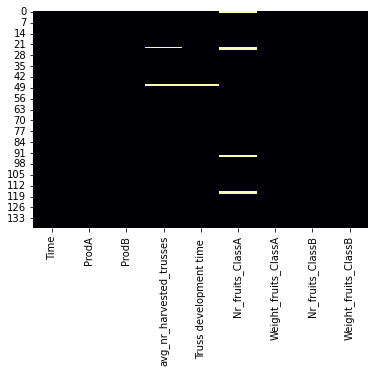

In [18]:
#Visualizing the null values
sns.heatmap(prd.isnull(),cbar=False,cmap='inferno')

In [19]:
#Replacing the null values with mean of their respective columns
num_col = ['avg_nr_harvested_trusses','Truss development time ', 'Nr_fruits_ClassA']
for col in num_col:
    prd[col]=pd.to_numeric(prd[col])
    prd[col].fillna(prd[col].mean(), inplace=True)

<AxesSubplot:>

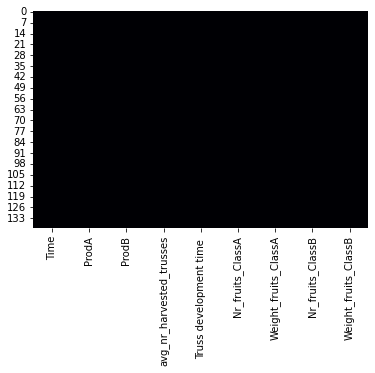

In [20]:
#Visualizing the null values again after replacing 
sns.heatmap(prd.isnull(),cbar=False,cmap='inferno')

# We can see that all the null values have disappeard from the data.

In [21]:
#Again checking for the null values sum in the data 
prd.isnull().sum()

Time                        0
ProdA                       0
ProdB                       0
avg_nr_harvested_trusses    0
Truss development time      0
Nr_fruits_ClassA            0
Weight_fruits_ClassA        0
Nr_fruits_ClassB            0
Weight_fruits_ClassB        0
dtype: int64

In [22]:
#View the data
prd.head()

,Time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,2020-02-19,0.037,0.0,0.1,50.0,132.798507,128.0,0,0
1,2020-02-24,0.767,0.0,0.9,54.5,136.000000,1271.0,0,0
2,2020-02-28,0.232,0.0,0.6,51.0,89.000000,788.0,0,0
3,2020-03-04,0.778,0.0,1.5,55.1,226.000000,2001.0,0,0
4,2020-03-09,0.248,0.0,0.9,53.6,133.000000,1144.0,0,0


In [23]:
#Getting all the column headings in a list
list(prd.columns.values)

['Time',
 'ProdA',
 'ProdB',
 'avg_nr_harvested_trusses',
 'Truss development time ',
 'Nr_fruits_ClassA',
 'Weight_fruits_ClassA',
 'Nr_fruits_ClassB',
 'Weight_fruits_ClassB']

In [24]:
#Storing all the listed column headings excluding 'Time' in  a variable 
list_prd=list(prd.columns.values)
list_prd.remove('Time')


In [25]:
#Converting all the int data types to float 
for i in list_prd:
    prd[i] = prd[i].astype(float)

In [26]:
#Printing data types of each column
prd.dtypes

Time                        datetime64[ns]
ProdA                              float64
ProdB                              float64
avg_nr_harvested_trusses           float64
Truss development time             float64
Nr_fruits_ClassA                   float64
Weight_fruits_ClassA               float64
Nr_fruits_ClassB                   float64
Weight_fruits_ClassB               float64
dtype: object

In [27]:
#Finding Correlation
correlation=prd.corr()
correlation

,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
ProdA,1.000000,0.169947,0.621215,-0.331248,0.502080,0.657412,0.117998,0.136591
ProdB,0.169947,1.000000,0.337827,-0.345956,-0.045279,0.020132,0.654168,0.641112
avg_nr_harvested_trusses,0.621215,0.337827,1.000000,-0.226741,0.733837,0.805107,0.353604,0.358226
Truss development time,-0.331248,-0.345956,-0.226741,1.000000,0.127251,-0.011390,-0.265162,-0.284191
Nr_fruits_ClassA,0.502080,-0.045279,0.733837,0.127251,1.000000,0.899968,0.001885,-0.004009
Weight_fruits_ClassA,0.657412,0.020132,0.805107,-0.011390,0.899968,1.000000,0.078810,0.096932
Nr_fruits_ClassB,0.117998,0.654168,0.353604,-0.265162,0.001885,0.078810,1.000000,0.985262
Weight_fruits_ClassB,0.136591,0.641112,0.358226,-0.284191,-0.004009,0.096932,0.985262,1.000000


# Plotting Heat map¶

<AxesSubplot:>

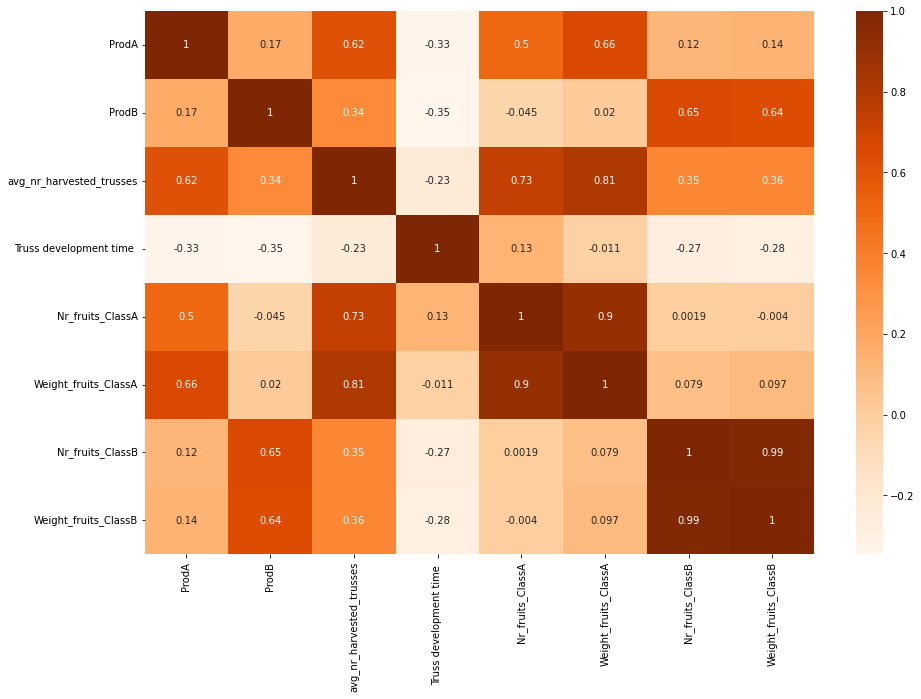

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(prd.corr(),cbar=True,annot=True,cmap='Oranges')


# From the Heat Map, we can see that 'Nr_fruits_ClassB' and 'Weight_fruits_ClassB' have strong positive correlation and, 'Truss development time ' and  'ProdB' have strong negative correlation.

# Plotting Pair plot to understand the relationship between column features.¶

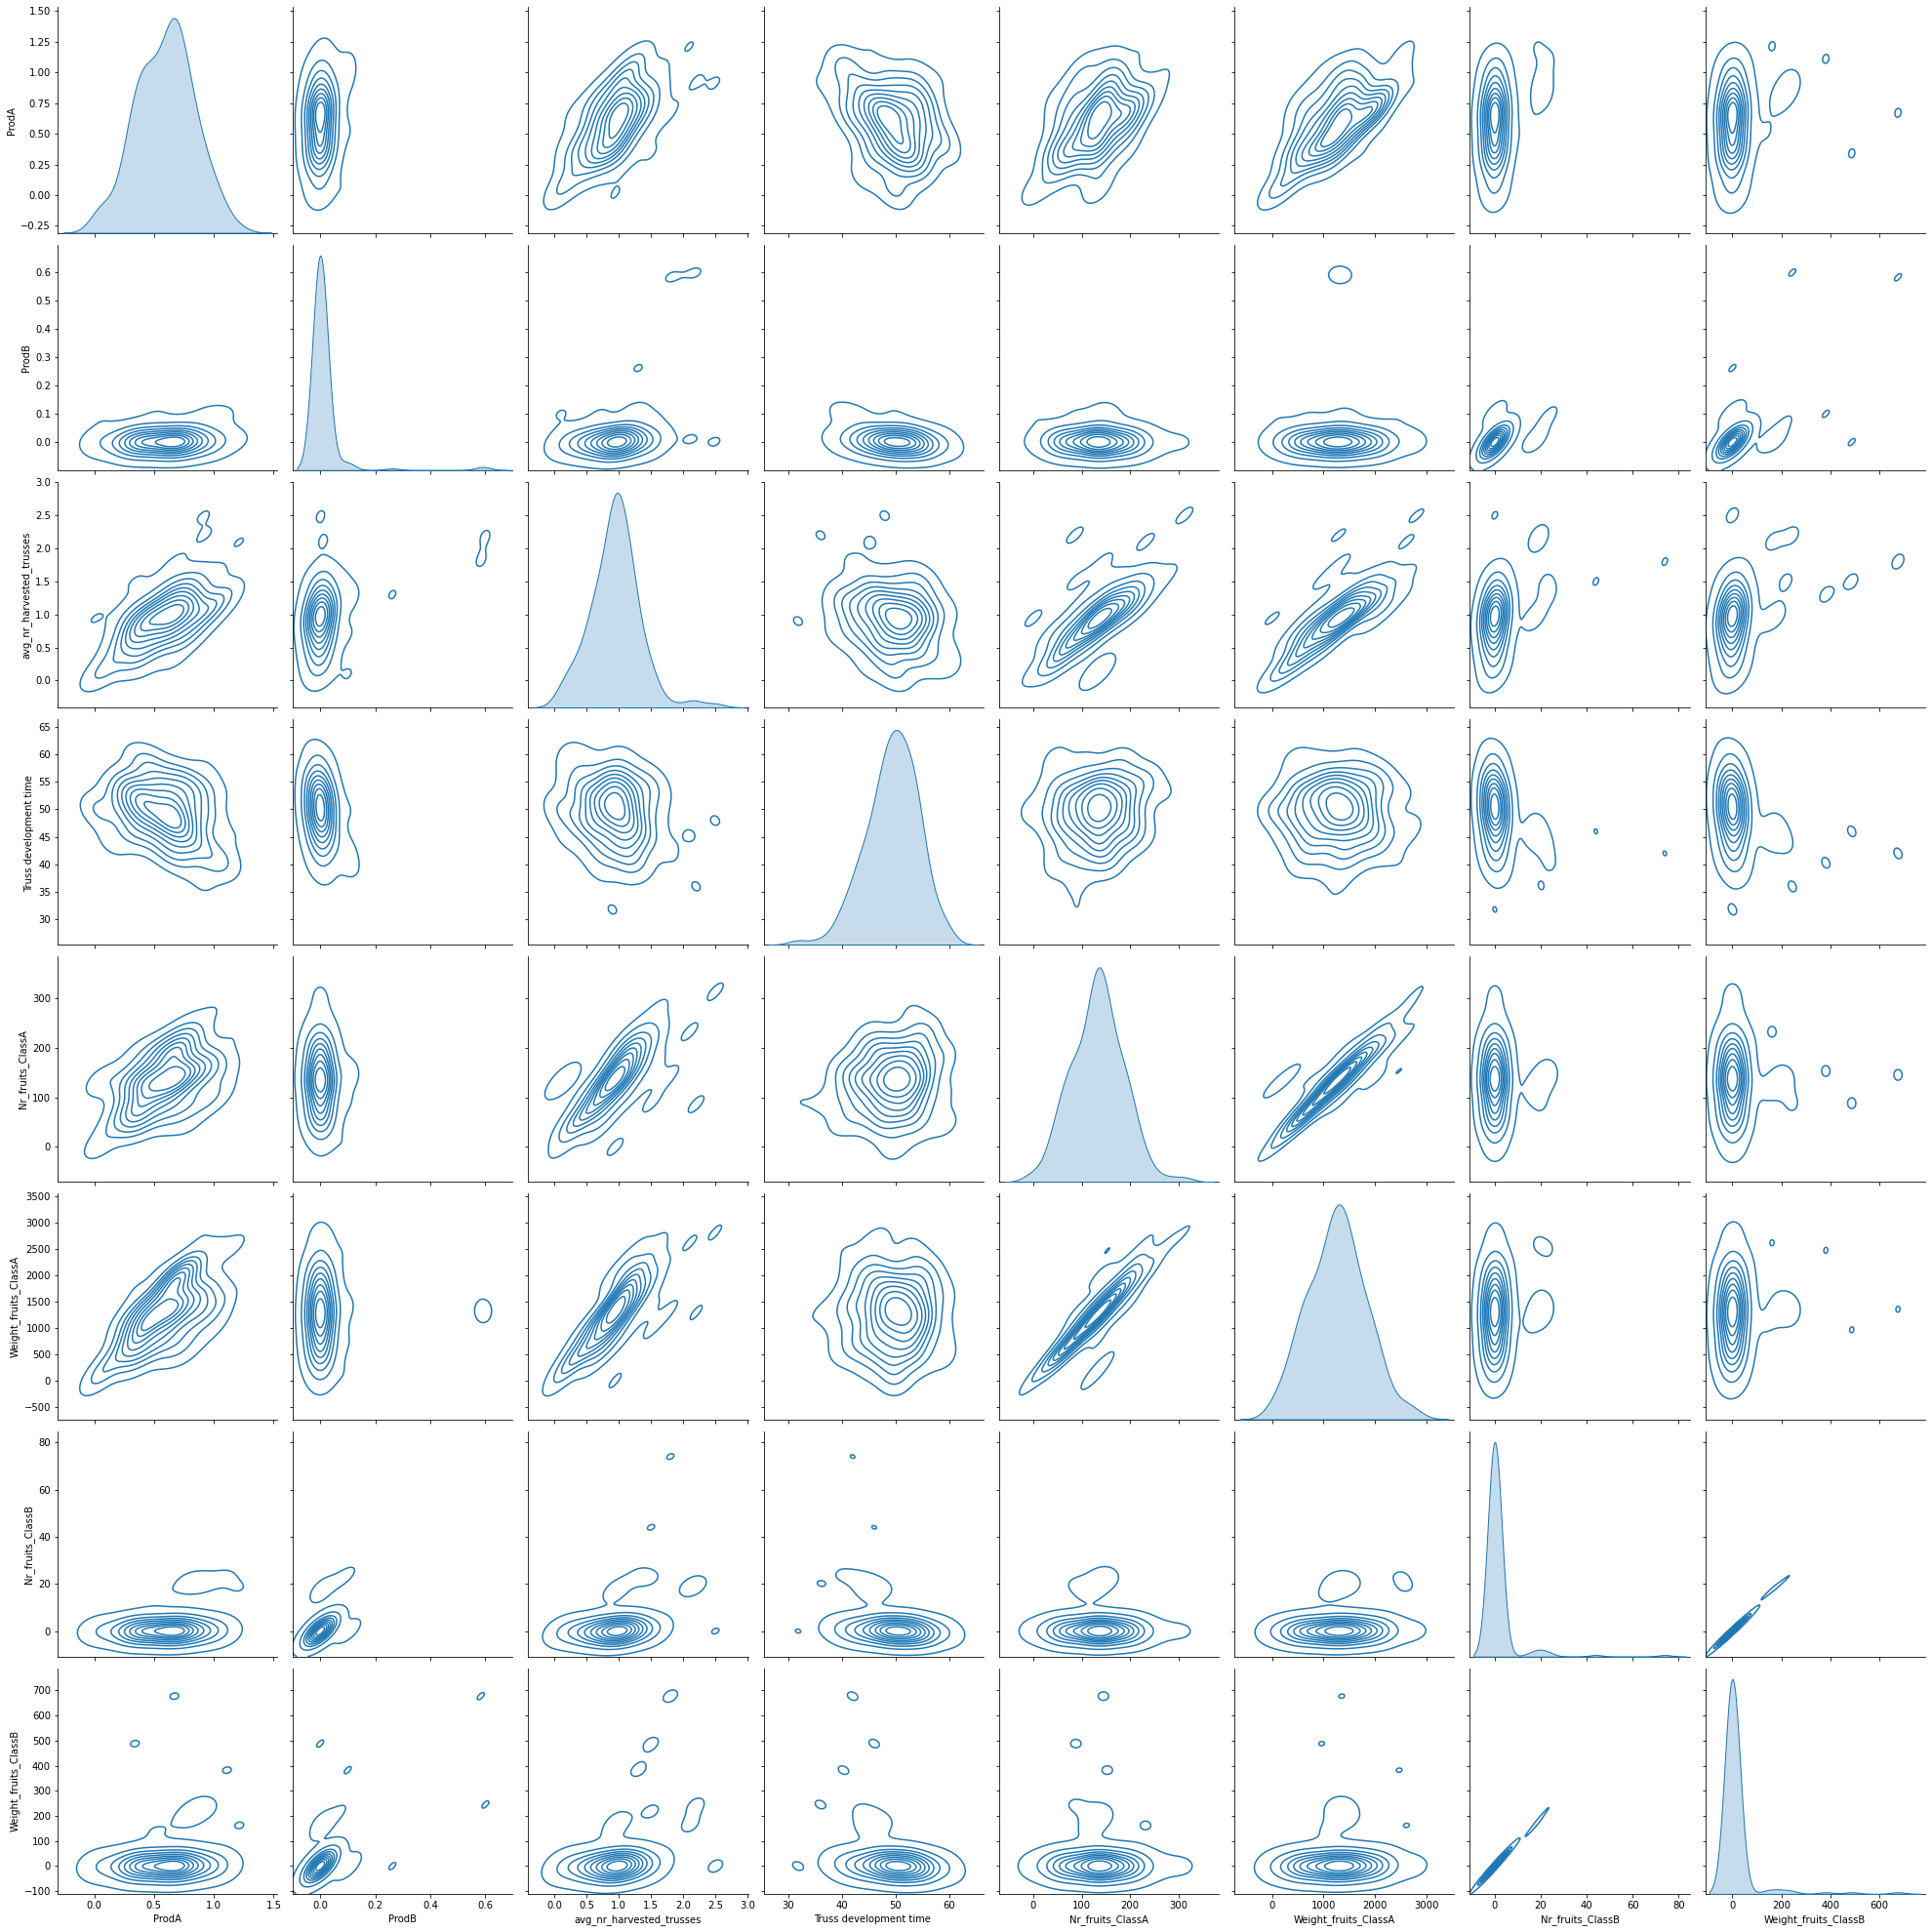

In [29]:
sns.pairplot(prd, height=3.5, kind="kde")

# Plotting Line Plot to analyze the data features with respect to time¶¶

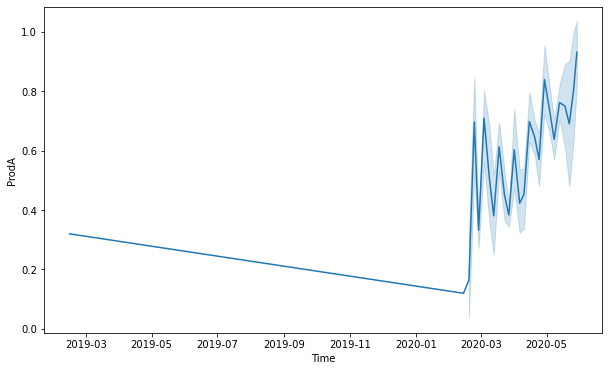

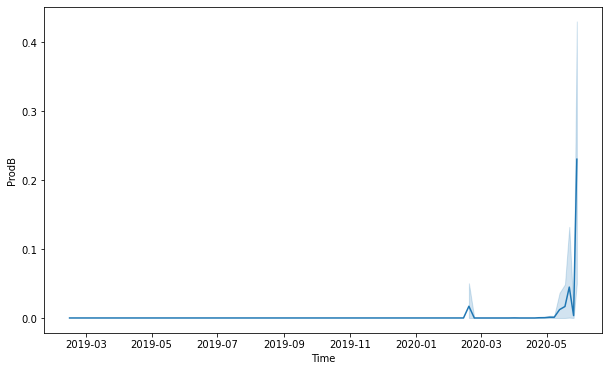

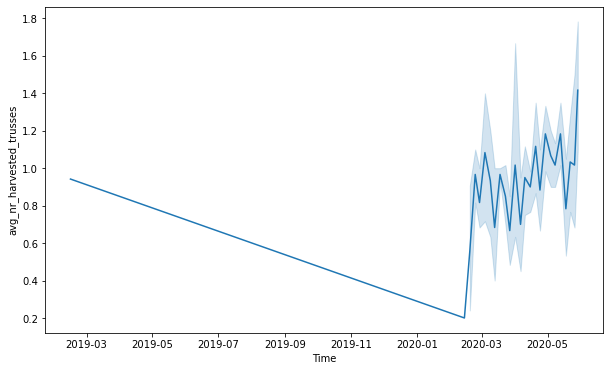

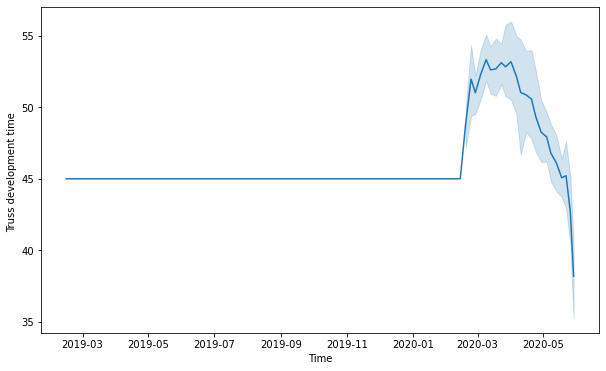

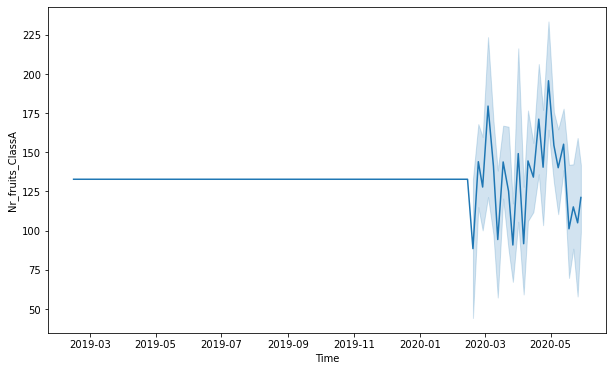

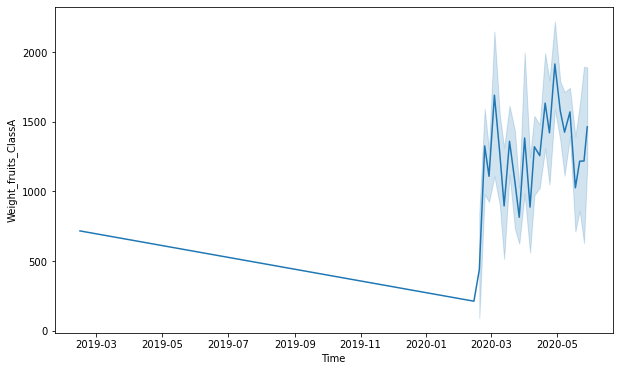

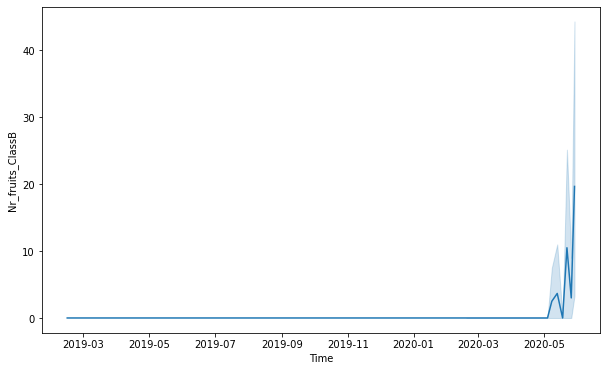

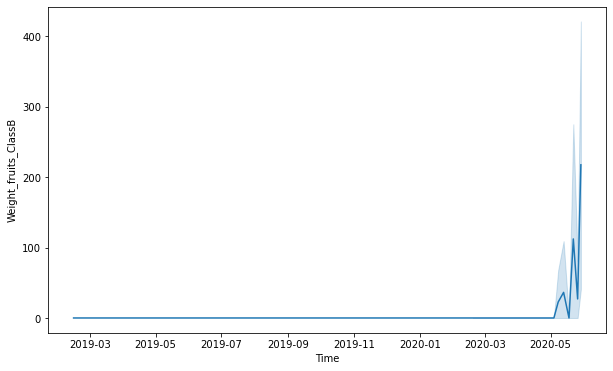

In [30]:
for col in ['ProdA', 'ProdB', 'avg_nr_harvested_trusses','Truss development time ', 'Nr_fruits_ClassA', 'Weight_fruits_ClassA','Nr_fruits_ClassB', 'Weight_fruits_ClassB']:
    plt.figure(figsize=(10,6))
    sns.lineplot(data=prd, x='Time', y=col)